# Regression analysis (a.k.a curve fitting)

## What is a model?
The goal of a scientific experiment is to identify the relationship between two phenomena - for instance, temperature and pain. 
To do so, we typically manipulate one of them and measure the effect on the other - change temperature, measure the pain level.

We represent this relationship graphically, by plotting the manipulated variable (temperature) vs. the observed feature (pain level):

![](fig/6.01_curve_fitting_1a.png)

Scientific modeling describes these dependencies quantitatively, using mathematics. It answers the question: How does property y depend on variable x?
This question is often answered using curve fitting: The idea is that the measured data points $y_i$ depend systematically on variable x (independent variable) with some noise and can be written down as a (more or less) simple equation.

![](fig/6.01_curve_fitting_1b.png)

## What is a model good for?
One thing we can do with a model is _prediction_:  The mathematical function determined with curve fitting allows us predict the property for new, untested values of the variable. That is, the equation acts as a stand-in for the process that generates the property based on our variable - we can _simulate_ the process. The model's predictions can then be tested experimentally. If the predictions do not match well the experimental measurements, the model (i.e. the formula describing the dependency) has to be adjusted. 

There are two types of simulation:
- _Interpolation_ predicts the property for values of the variable between those already tested.
- _Extrapolation_ predicts how the property will develop outside the tested variable range. This application is particularly useful, but also more dangerous, because it relies on assumptions that cannot be verified at the moment the predictions are calculated. This becomes obvious for predictions into the future, e.g. climate models.

![](fig/6.01_curve_fitting_1c.png)

Another use of curve fitting is to _quantify the change_ in a relationship. For instance, different sensory neurons have different preferred stimuli - we can measure and present that preference in a tuning curve. Or we measure the effect of a treatment - inactivating inhibitory inputs to a neuron may change that neuron's tuning curve. 

![](fig/6.01_curve_fitting_1d.png)

While we can describe the changes in the curves with words, curving fitting allows us to quantiatively describe these differences:
- We can fit Gaussians to the tuning curves on the left. The mean parameter specifies the preferred orientation (the position of the peak) - it is 115, 160 and 206 degrees. The standard deviation parameter corresponds to the width. It is identical for all three cells at 115 degrees.
- We can fit a sigmoidal function to the intensity curves on the right. Removing inhibition increases the steepness of the curve (the slope parameter) from 10 to 20, and makes the cell more sensitive - it shifts the curve to the left with a midpoint (intensity at which 50% of the maximal response is elicited) from 50 to 30 dB. The maximal response rate does not change.

Curve fitting therefore allows us to summarize many data points in terms of curve parameters - and we can do statistics on these parameters, to determine whether experimental manipulations change ithe parameters.

## Regression analysis
So how does curve fitting work, conceptually?
Our equation describing the measured relationship can be a linear equation $y = 10 * x + 9.3$ or a quadratic equation $y = (x - 102)^2 / 3 + 18$ or something else. The equations have three components:
- Our manipulated variable(s) $x$ and our measured variable(s) $y$.
- Mathematical operations like $+$ or $-$ or the square ($^2$) etc. These operations are fixed and define the structure of the equation and thereby the types of dependencies the equation can capture. A linear equation can only produce lines, a quadratic equation can only produce parabolas.
- Other numbers in the equation are fixed for all values of $x$ and $y$ and they are called _parameters_. They "tune" the specific form of the relation between $x$ and $y$. For instance, in the equation $y = 10 * x + 9.3$, 10 determines the slope, and 9.3 the intercept of the line. More generally, we can write the linear equation as $y = m * x + n$, with $m$ and $n$ being the slope and intercept parameters. These parameters determine the type of line that describes our data.

![](fig/6.01_curve_fitting_1e.png)

_Curve fitting_ is the procedure of determining the parameters that best describe the data given a specific model. Curve fitting is also called _regression_. Fitting a line is called _linear regression_, fitting a nonlinear curve, is called _nonlinear regression_.

In curve fitting, we need:
1. _A model_: Specify an adequate _equation_ that has the potential to describe our data with an appropriate choice of _parameters_. A line cannot describe the curved relationship between temperature and pain in the plot above - there is no set of slopes and intercepts that produces a curve from a linear equation. So we need something more complicated, like a quadratic equation.
2. A way to quantify the "goodness of fit": An _error function_ or _objective function_ that tells us how good or bad the fit between the experimental data points and the curve produced by the model is, so we can 1) adjust the parameters to maximize the fit and 2) judge how good the fit is in the end.
3. A way to improve the fit: A _fitting procedure_ to find parameter values that result in a line or curve fits our data best - is "as close as possible" to our data.

Here, we will discuss _linear regression_, in which the model is a line. Linear models are intuitive and the parameters are straightforward to understand. In addition, procedures for fitting and assessing the goodness of fit are robust and well established. 

_Nonlinear regression_, in which the model can be of arbitrary form, is more flexible and powerful, but also a bit more complicated.

## Linear regression
### The model
For linear regression, the model is specified by a linear function with two parameters, the slope and the intercept: $y=\text{slope} * x + \text{intercept}$. Linear models are easy to fit and interpret, but also rather constrained, since the can only capture linear relationships.

Let's load some data to have an example to work through:
We've stressed two students by exposing them to free jazz by Ornette Coleman and want to quantify how quickly the cortisol levels increase in the blood as a function of free-jazz exposure. To that end, we took blood at 6-minute intervals after the onset of music exposure from our subject and quantified the concentration of cortisol.

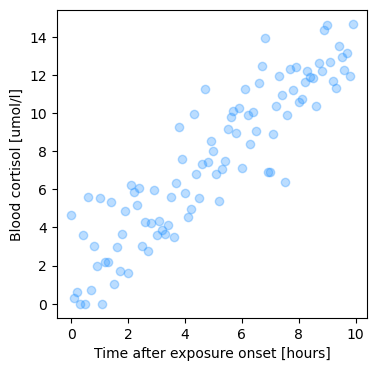

In [9]:
import numpy as np
import matplotlib.pyplot as plt

d= np.load('6.01_linear_regression.npz')

plt.figure(figsize=(4, 4))
plt.plot(d['time'], d['jazz_cortisol'], 'o', alpha=0.3, c='dodgerblue')

plt.xlabel('Time after exposure onset [hours]')
plt.ylabel('Blood cortisol [umol/l]')
plt.show()

## Quantifying goodness of fit

### The mean of the squared residuals
The mean of the squared residuals, or _mean-squared error_ (MSE) is a commonly used error term:

Let $f(x_i, \theta)$ be our function (linear, exponential, quadratic), with parameters $\theta$, and $\hat{y_i} = f(x_i, \theta)$ our prediction for $N$ data points $x_i$.
In linear regression $\theta$ is $(m, n)$, the slope and the intercept.

To compute the MSE we:

1. Calculate the difference between all $N$ predictions and data, $y_i - \hat{y_i}$ - also called the _residuals_.
2. Square each residual to get the _squared residuals_.
3. Take the mean.

![](fig/6.01_curve_fitting_1g.png)

Mathematically, the erors is given by $E = 1/N \sum_i^N (y_i - \hat{y_i})^2$. This looks a lot like the formula for the variance! The MSE captures the residual variance - the variance in the data not explained by the model prediction.

### Why the _squared_ residuals?
To illustrate this, let's fit our data using a function that is just horizontal line with a constant offset for all x-values.

![](fig/6.01_curve_fitting_1h.png)

A horizontal line is clearly not a good model for these data, but there is a value of the offset parameter for which the _non-squared error is zero_!! Not so for the squared error.

### Coefficient of Determination
The MSE captures the match between model and data, but it is not normalized: it scales with the magnitude of the data. This makes it hard to determine what value of MSE indicates a good fit, and it makes it hard to compare MSE across data sets with different magnitudes.

The Coefficient of Determination $R^2$ is a normalized variant of the MSE: 
$R^2 = 1 - MSE / \sigma^2$.
It is the ratio between the MSE - the variance of the residuals - and $\sigma^2$ - the total variance of the data. It therefore corresponds to the fraction of the variance in the data explained by a model.

If the MSE is much smaller than the data variance, then $R^2$ approaches 1.0. This corresponds to a perfect fit, without any deviation between the data and the fitted line. Noise in the data or a mismatched model (for instance if the relationship between x and y is not linear) will decrease the $R^2$.

$R^2$ can also be calculated as the square of Pearson's correlation, $r$, between the data $y$ and the model predictions $\hat{y}$.

## Linear regression using scipy
`res = scipy.stats.linregress(x, y)` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html))

`linregress` requires two main arguments: your data `x` and `y`.

It returns a python object, `LinregressResult`, holding the results of the linear regression with information on:
- `slope` and `intercept`: the fitted parameters
- `rvalue`: pearson's $r$. The square of $r$, $r^2$, is equal to the coefficient of determination.
- `pvalue`: The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using a variant of the t test.
- `stderr` and `intercept_stderr`: Standard errors for the estimated slope and intercept.

We can generate model predictions `y_pred` using the fitted parameters from the regressionr results: `y_pred = res.intercept + res.slope * x`.

Let's perform linear regression on our data:

LinregressResult(slope=1.2445293715645902, intercept=1.358218275477359, rvalue=0.9057931143970367, pvalue=2.5177141101420217e-38, stderr=0.058808797325218536, intercept_stderr=0.3369851849823764)
R^2 = 0.8204611660890831


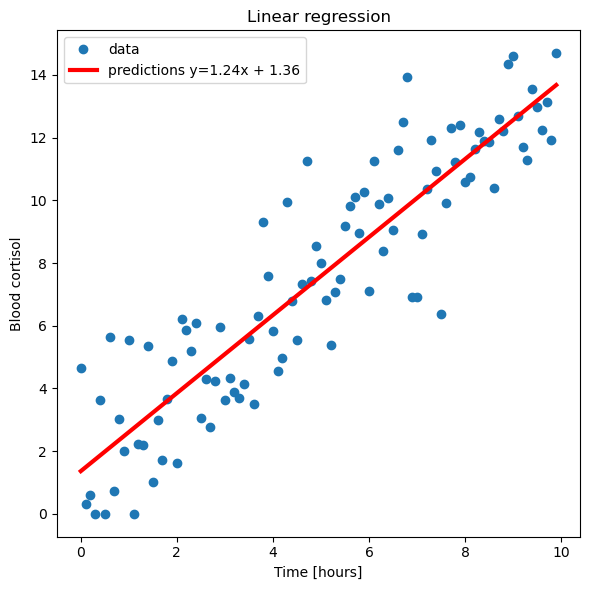

In [11]:
import scipy.stats

x, y = d['time'], d['jazz_cortisol']

res = scipy.stats.linregress(x, y)
print(res)

print('R^2 =', res.rvalue**2)

y_pred = res.intercept + res.slope * x

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o', label='data')
plt.plot(x, y_pred, 'r', linewidth=3, label=f'predictions y={res.slope:1.2f}x + {res.intercept:1.2f}')
plt.xlabel('Time [hours]')
plt.ylabel('Blood cortisol')
plt.title('Linear regression')
plt.legend()
plt.tight_layout()
plt.show()